In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Assuming that 1k dollar to 100k dollar is spending

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### EDA

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
df_list=list(['Annual Income (k$)',
       'Spending Score (1-100)'])

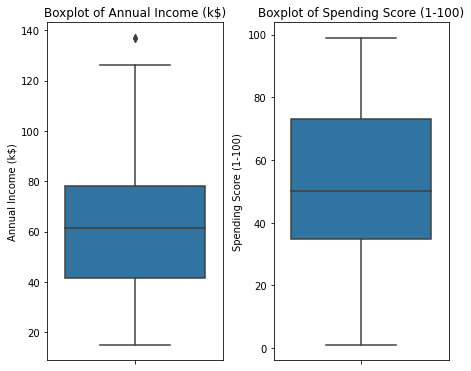

In [9]:
plt.figure(figsize = (19,15))
feature_list = df_list
for i in range(len(feature_list)):
    plt.subplot(3, 6, i + 1)
    sns.boxplot(y = df[feature_list[i]], data = df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [10]:
def remove_outlier(col):
    Q1,Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3+(1.5 * IQR)
    return lower_range, upper_range

In [11]:
for i in feature_list:
    LL, UL = remove_outlier(df[i])
    df[i] = np.where(df[i] > UL, UL, df[i])
    df[i] = np.where(df[i] < LL, LL, df[i])

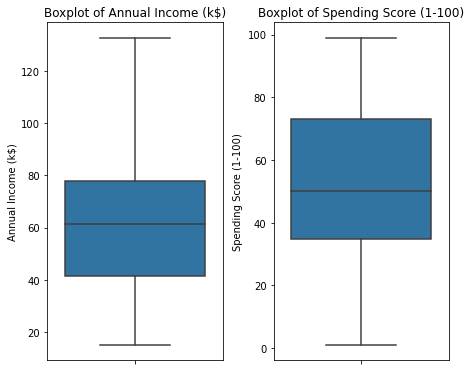

In [12]:
plt.figure(figsize = (19,15))
feature_list = df_list
for i in range(len(feature_list)):
    plt.subplot(3, 6, i + 1)
    sns.boxplot(y = df[feature_list[i]], data = df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

Text(45, 22, 'Mean age38.098214285714285')

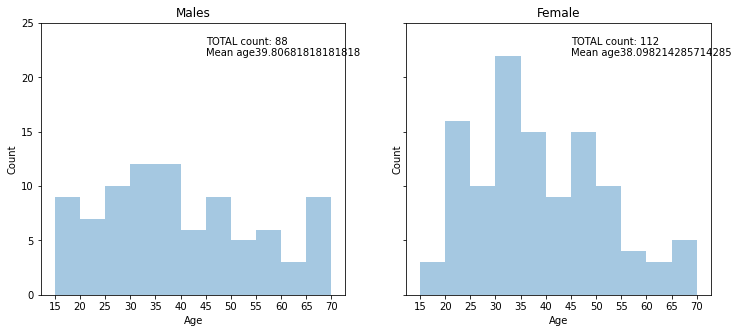

In [13]:
males_age=df[df["Gender"]=="Male"]["Age"] # subset with males age
females_age = df[df["Gender"]=="Female"]["Age"] # subset with females age

age_bins = range(15,75,5)

#males histogram 
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.distplot(males_age, bins=age_bins, kde=False, ax=ax1)
ax1.set_xticks(age_bins) 
ax1.set_ylim(top=25)
ax1.set_title("Males") 
ax1.set_ylabel("Count") 
ax1.text(45,23, "TOTAL count: {}".format(males_age.count()))
ax1.text(45,22, "Mean age{}".format(males_age.mean()))

#females histogram 
sns.distplot(females_age, bins=age_bins, kde=False, ax=ax2)
ax2.set_xticks(age_bins)
ax2.set_title("Female")
ax2.set_ylabel("Count")
ax2.text(45,23, "TOTAL count: {}".format(females_age.count()))
ax2.text(45,22, "Mean age{}".format(females_age.mean()))

Text(65, 22, 'Annual income median: 59.25')

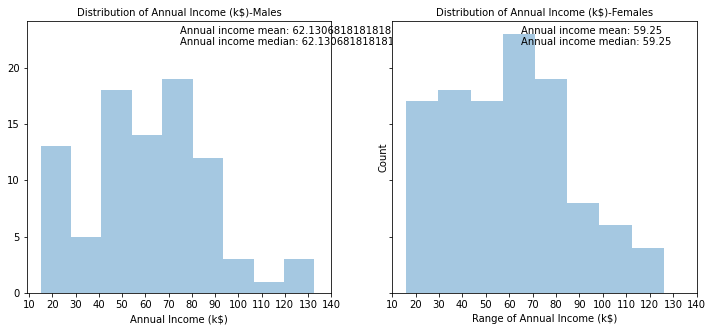

In [14]:
#Distribution of Annual Income
bins = range(10,150,10)
males_annu= df[df["Gender"]=="Male"]["Annual Income (k$)"] # subset with males
females_annu = df[df["Gender"]=="Female"]["Annual Income (k$)"] # subset with females
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.distplot(males_annu, ax=ax1,  kde=False )
ax1.set_title('Distribution of Annual Income (k$)-Males', fontsize = 10)
ax1.set_xticks(bins)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')
ax1.text(75,23, "Annual income mean: {}".format(males_annu.mean()))
ax1.text(75,22, "Annual income median: {}".format(males_annu.mean()))

sns.distplot(females_annu, ax=ax2,  kde=False)
ax2.set_title('Distribution of Annual Income (k$)-Females', fontsize = 10)
ax2.set_xticks(bins)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')
ax2.text(65,23, "Annual income mean: {}".format(females_annu.mean()))
ax2.text(65,22, "Annual income median: {}".format(females_annu.mean()))

<AxesSubplot:xlabel='Gender', ylabel='Annual Income (k$)'>

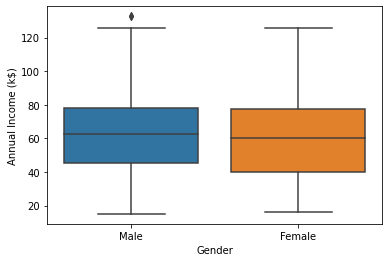

In [15]:
sns.boxplot(x="Gender", y="Annual Income (k$)", data=df)

Text(0, 0.5, 'Count')

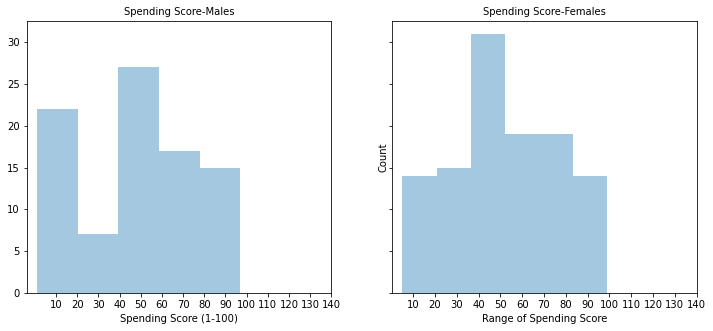

In [16]:
#Distribution of Spending Score
bins = range(10,150,10)
males_spending= df[df["Gender"]=="Male"]["Spending Score (1-100)"] # subset with males
females_spending = df[df["Gender"]=="Female"]["Spending Score (1-100)"] # subset with females
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.distplot(males_spending, ax=ax1,  kde=False )
ax1.set_title('Spending Score-Males', fontsize = 10)
ax1.set_xticks(bins)
plt.xlabel('Range of Spending Score')
plt.ylabel('Count')

sns.distplot(females_spending, ax=ax2,  kde=False)
ax2.set_title('Spending Score-Females', fontsize = 10)
ax2.set_xticks(bins)
plt.xlabel('Range of Spending Score')
plt.ylabel('Count')

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

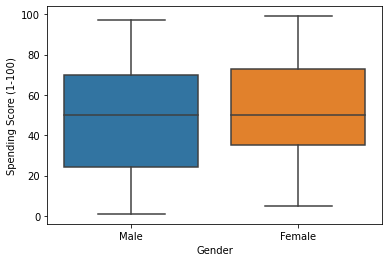

In [17]:
sns.boxplot(x="Gender", y="Spending Score (1-100)", data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

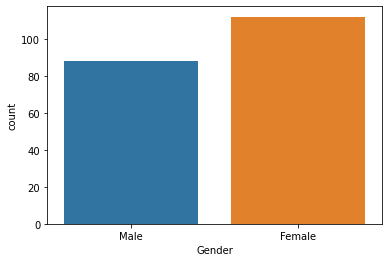

In [18]:
#Gender Analysis:
sns.countplot(x="Gender", data=df)

### Clustering: Perform z-score scaling

In [19]:
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

In [20]:
df1=df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [21]:
df1.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15.0,39.0
1,21,15.0,81.0
2,20,16.0,6.0
3,23,16.0,77.0
4,31,17.0,40.0


In [22]:
 df_scaled = df1.apply(zscore)

In [23]:
X = StandardScaler()

In [24]:
df_scaled =  X.fit_transform(df1)
df_scaled = pd.DataFrame(df_scaled,columns=df1.columns)
df_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.745429,-0.434801
1,-1.281035,-1.745429,1.195704
2,-1.352802,-1.707083,-1.715913
3,-1.137502,-1.707083,1.040418
4,-0.563369,-1.668737,-0.395980


### K Mean

In [25]:
from sklearn.cluster import KMeans

The Within-Cluster Sum of Squares (WCSS) is a metric used to evaluate the quality of clustering in KMeans and other centroid-based clustering algorithms. It measures how compact the data points are within each cluster, quantifying the variance or spread of data points from their respective cluster centers. The WCSS is a critical factor in helping to determine the optimal number of clusters for a dataset.

In [26]:
wcss = []
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(df_scaled)
    wcss.append(KM.inertia_)

In [27]:
wcss

[600.0,
 389.38622652676906,
 295.1877247206851,
 204.69696344803396,
 167.57686457179994,
 133.09247804000822,
 116.41758999699883,
 103.13816291118951,
 92.2172812011869,
 81.84431312153293]

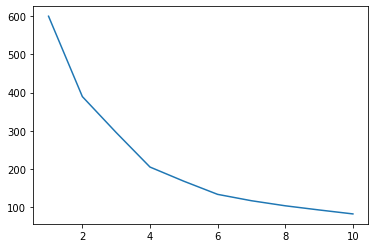

In [28]:
plt.plot(range(1,11), wcss)

In [29]:
k_means = KMeans(n_clusters = 6)
k_means.fit(df_scaled)
labels = k_means.labels_

In [30]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [31]:
silhouette_score(df_scaled, labels)
#after using the scaled data the silhouette_score is coming positive 
#else it was negative on unscalled data

0.42835401089894504

When interpreting silhouette scores:

#### Positive Scores: 
A positive silhouette score indicates that the sample is well-matched to its own cluster and poorly-matched to neighboring clusters. The larger the score, the better the separation.
#### Score Near 0: 
A score near zero suggests that the sample is on or very close to the decision boundary between two neighboring clusters.
#### Negative Scores: 
A negative silhouette score indicates that the sample might have been assigned to the wrong cluster. This often occurs when clusters overlap or when points are closer to points in other clusters than their own.

In [32]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:
    k_means = KMeans(n_clusters)
    k_means.fit(df_scaled)
    labels = k_means.labels_

    silhouette_avg = silhouette_score(df_scaled, labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.3351423622452222
For n_clusters = 3 The average silhouette_score is : 0.3574111960837928
For n_clusters = 4 The average silhouette_score is : 0.404571485370916
For n_clusters = 5 The average silhouette_score is : 0.4174427242483793
For n_clusters = 6 The average silhouette_score is : 0.4277914482997785
For n_clusters = 7 The average silhouette_score is : 0.4181142918310162
For n_clusters = 8 The average silhouette_score is : 0.41169768752539226
For n_clusters = 9 The average silhouette_score is : 0.41796172182642183
For n_clusters = 10 The average silhouette_score is : 0.4047110071753535


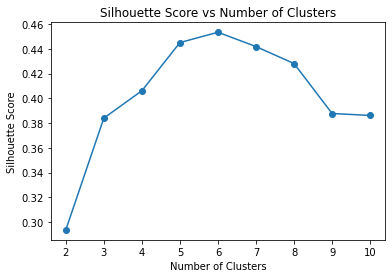

In [33]:
import matplotlib.pyplot as plt

# Number of clusters (x-axis values)
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Silhouette scores (y-axis values)
silhouette_scores = [0.2935610473840494, 0.3840264152843733, 0.40614375021198673,
                     0.44513180310309386, 0.4534885435878979, 0.4418866283911202,
                     0.4281524268991225, 0.38774619022244194, 0.38619309014215647]

# Create the plot
plt.plot(n_clusters, silhouette_scores, marker='o')

# Add labels and title
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')

# Show the plot
plt.show()

The point where the silhouette score starts to decrease after reaching its peak at 6 clusters.
We want to choose 6 clusters as the optimal number, as it's the point where the silhouette score is relatively high 
and starts to decline afterward.

In [34]:
sil_width = silhouette_samples(df_scaled, labels)

In [35]:
silhouette_samples(df_scaled, labels).min()

-0.12401238015788073

silhouette_samples(df_scaled, labels): This calculates the silhouette score for each sample in the scaled DataFrame df_scaled based on the cluster labels labels.

.min(): This function is then used on the array of silhouette scores to get the minimum value. The minimum silhouette score indicates the sample that is least well-matched to its assigned cluster, which could potentially indicate a problematic point or cluster.

In [36]:
k_means = KMeans(n_clusters = 6, random_state = 1)
k_means.fit(df_scaled)
labels_6 = k_means.labels_
silhouette_score(df_scaled, labels_6, random_state = 1)

0.4277914482997785

In [37]:
df["Clus_kmeans6"] = labels_6

In [38]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus_kmeans6
0,1,Male,19,15.0,39.0,4
1,2,Male,21,15.0,81.0,4
2,3,Female,20,16.0,6.0,5
3,4,Female,23,16.0,77.0,4
4,5,Female,31,17.0,40.0,5


In [39]:
freq = df.Clus_kmeans6.value_counts().sort_index()
freq

0    38
1    45
2    39
3    34
4    23
5    21
Name: Clus_kmeans6, dtype: int64

In [40]:
clus_profile=df.drop(["CustomerID"], axis=1)
clust_profile1 = clus_profile.groupby(['Clus_kmeans6','Gender']).mean()
clust_profile1

Age  Annual Income (k$)  Spending Score (1-100)
Clus_kmeans6 Gender                                                       
0            Female  27.960000           57.360000               47.120000
             Male    25.153846           55.307692               53.000000
1            Female  54.153846           54.230769               48.961538
             Male    59.315789           54.315789               49.210526
2            Female  32.190476           86.047619               81.666667
             Male    33.277778           86.875000               82.666667
3            Female  43.785714           93.285714               20.642857
             Male    39.500000           84.937500               14.050000
4            Female  25.461538           25.692308               80.538462
             Male    24.400000           24.700000               73.800000
5            Female  41.538462           26.538462               20.692308
             Male    52.000000           25.875000               17.250000

Cluster 0, females have a slightly higher Annual Income but lower Spending Score compared to males.

Cluster 1, both genders have similar attributes, indicating a balanced segment.

Cluster 2 has females and males with higher Annual Income and Spending Scores, suggesting they might be high-spending customers.

Cluster 3 has females and males with relatively low Spending Scores, indicating potential budget-conscious customers.

Cluster 4, both genders have similar attributes, indicating a balanced segment.

Cluster 5 has females with higher Spending Scores and males with moderate scores, suggesting a cluster of female shoppers and average-spending males.

### Potential Marketing Strategies: These insights can guide marketing strategies:

High-spending customers in Cluster 2 might be targeted with premium products or services.

Budget-conscious customers in Cluster 3 might respond well to promotions or discounts.

Female shoppers in Cluster 5 might be interested in products related to their higher Spending Scores.

###  Hierarchical Clustering by constructing a Dendrogram using WARD and Euclidean distance.

In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [42]:
wardlink = linkage(df_scaled, method = 'ward') 
#The 'ward' linkage method aims to minimize the variance of distances between clusters,
#making it suitable for minimizing the overall variance in cluster sizes.

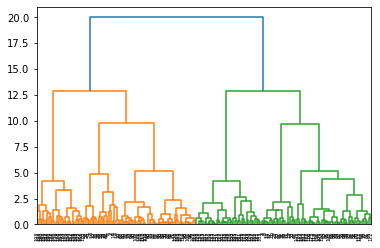

In [43]:
dend = dendrogram(wardlink)

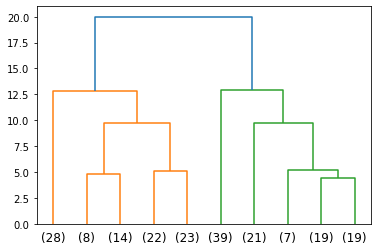

In [44]:
dend = dendrogram(wardlink,
                 truncate_mode = 'lastp',
                 p = 10,
                 )

The truncate_mode and p parameters allow you to control the level of detail displayed in the dendrogram, making it easier to interpret when dealing with a large number of clusters.
truncate_mode='lastp': This parameter specifies how to truncate (cut) the dendrogram for visualization. 'lastp' means that you will cut the tree to show only the last p merged clusters. The p parameter specifies the number of clusters to show.

In [45]:
from sklearn.cluster import AgglomerativeClustering

In [46]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average') 
#creating Instance of AgglomerativeClustering
Cluster_agglo=cluster.fit_predict(df_scaled)
print(Cluster_agglo)

[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1
 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 2 0 2 0 2 0 0 0 2 0 2 0 2 0 2 0 0 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [47]:
silhouette_avg = silhouette_score(df_scaled, Cluster_agglo)
silhouette_avg

0.34004455159841124

In [48]:
# Adding the cluster labels to your original DataFrame
df_with_clusters = pd.concat([df_scaled, pd.Series(Cluster_agglo, name='Cluster')], axis=1)

# Calculate mean values of features for each cluster
cluster_means = df_with_clusters.groupby('Cluster').mean()

print("Cluster Characteristics (Means):")
print(cluster_means)

Cluster Characteristics (Means):
              Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                      
0       -0.771571            0.040730                0.794690
1        0.852569           -0.550475               -0.372897
2        0.203510            1.057962               -1.277784


Interpreting the means:

For Cluster 0, the mean values indicate relatively lower Age, slightly positive Annual Income, and high Spending Score. This cluster could represent customers who are younger, with moderate to high income, and high spending habits.

For Cluster 1, the mean values indicate higher Age, relatively lower Annual Income, and slightly below-average Spending Score. This cluster might represent older customers with lower income and moderate spending.

For Cluster 2, the mean values indicate moderate Age, high Annual Income, and low Spending Score. This cluster could represent customers who are middle-aged, with high income, but conservative spending habits.

### Conclusion

Comparing the two silhouette scores:

The silhouette score for KMeans (0.4277914482997785) is higher than that of Agglomerative Clustering (0.34004455159841124).
This suggests that, according to the silhouette score metric, the clusters formed by KMeans are relatively better separated and more distinct than those formed by Agglomerative Clustering.